# Stabilizer codes

<div style="width:100%;text-align:right;font-size:0.75em;opacity:0.2">Latex macros</div>
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\bra}[1]{\langle #1|} $
$\newcommand{\iu}{{i\mkern1mu}}$
$ \newcommand{\e}{\mathrm{e}}$
$\newcommand{\bigo}{\mathcal{O}}$
$\newcommand{\set}[1]{\{#1\}}$
$\newcommand{\oper}[1]{\mathcal{#1}}$
$\newcommand{\st}[1]{\mathcal{#1}}$
$\newcommand{\vecs}[1]{\mathcal{#1}}$
$\newcommand{\group}[1]{\mathcal{#1}}$
$\newcommand{\union}{\hspace{0.25em}\cup\hspace{0.25em}}$

We now have all the ingredients to define stabilizer codes. To define a error-correcting code we need four ingredients

* Encoding: A method to encode each message into a codewords. For quantum codes, we need to map each basis element of the message space to a basis element of the codespace.
* Syndrome measurements: A method to do syndrome measurements on the corrupted codewords, to extract information about the error.
* Decoding: A method to transfrom the corrected codewords back into a message.
* Logical gates: Methods to implement logical gates directly on an encoded qubit.

Stabilizer codes are defined with respect to a stabilizer group $S$. We label the stabilizer code based on $S$ as $C(S)$. Then, the ingredients for $C(S)$ are

* Encoding: The simultaneous stabilizer states of the stabilizer group $S$ define the basis elements of the codespace. An encoding circuit can be systematically constructed using the generators of $S$; a procedure we will show later.
* Syndrome measurements: All generators of $S$ are measured one by one. The results of the measurement indicate which error has occured. 
* Decoding: Decoding is also based on $S$.
* Logical gates: These can also be constructed from $S$.

## Repetition code for bit-flips
Let's see how all this applies to the repetition code. The repetition code is based on the group $S$ generated by $P_1 = Z \otimes Z \otimes I$ and $P_2 = I \otimes Z \otimes Z$.

* Encoding: We saw in [stabilizer groups](../stabilizer-codes/stabilizer-groups.ipynb) that this group simultaneously stabilizes the states $\set{\ket{000},\ket{111}}$. In [quantum repetition code for bit-flips](../qec-intro/quantum-repetition-code-for-bit-flips.ipynb) we presented an ad-hoc encoding circuit for this code as

  ![Repetition code encoding](../../images/repetitioncodeencoding.png)
  
  We will see later on how to construct this from $S$.
  
* Syndrome measurements: We saw in [syndrome measurements for stabilizer codes](../stabilizer-codes/syndrome-measurements.ipynb) this is achieved using the following circuit.
  
  ![repetition code syndrome](../../images/repetitioncodesyndrome2.png)
  
  Here we are measuring the two generators $P_1$ and $P_2$. 

* Decoding: In [quantum repetition code for bit-flips](../qec-intro/quantum-repetition-code-for-bit-flips.ipynb) we noted that the encoding circuit for the repetition code is self-inverse, and can also be used for decoding. We will present a different procedure later on.


#### Task 1 (On paper)
Show that the repetition code for phase-flips is also a stabilizer code.

#### Solution:
The repetition code for phase flips is based on the group $S$ generated by $P_1 = X \otimes X \otimes I$ and $P_2 = I \otimes X \otimes X$. 

Encoding: We saw in [stabilizer groups](../stabilizer-codes/stabilizer-groups.ipynb) that this group simultaneously stabilizes the states $\set{\ket{+++},\ket{---}}$. In quantum repetition code for phase-flips we presented an ad-hoc encoding circuit for this code as the following circuit:-


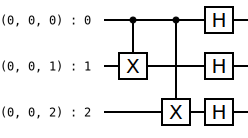

In [2]:
import stac
enc_circ = stac.Circuit.simple(3)
enc_circ.append('CX', 0, 1)
enc_circ.append('CX', 0, 2)
for i in range(3):
    enc_circ.append('H', i)
enc_circ.draw()

Syndrome measurements: We saw in syndrome measurements for stabilizer codes this is achieved using the following circuit, where we are measuring the two generators $P_1$ and $P_2$.

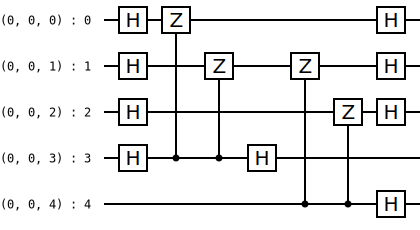

In [1]:
import stac
synd_circ = stac.Circuit.simple(5)
for i in range(4):
    synd_circ.append('H', i)

synd_circ.append('CZ', 3, 0)
synd_circ.append('CZ', 3, 1)
synd_circ.append('H', 3)
synd_circ.append('CZ',  4,1)
synd_circ.append('CZ',  4,2)
synd_circ.append('H', 4)

for i in range(3):
    synd_circ.append('H', i)

synd_circ.draw()

* Decoding: In quantum repetition code for phase-flips we noted that the encoding circuit for the repetition code is self-inverse, and can also be used for decoding. 

### Which errors are correctable by a stabilizer code
Up till now, we have discussed three codes, and discovered that they all correct different sets of errors

* The repetition code for bit-flips corrects all single-qubit $X$ errors.
* The repetition code for phase-flips corrects all single-qubit $Z$ errors.
* The Shor code corrects all single-qubit errors.

Is there a rule that tells us which errors are correctable by the code? Indeed there is.

**Theorem:** Let $S$ be a stabilizer group, with generators $\set{g_i}$, and let $C(S)$ be the associated stabilizer code. Then $C(S)$ detects an error $E \in {P}_n$ if it anti-commutes with at least one generator $g_k$ of $S$.

Let's explore why this theorem is correct. To detect errors, we measure all the generators of the stabilizer group. Let's concentrate on the measurement of just one generator $g_k$. There are three possibilities.

1. No error has occured and the data qubits are in state $\ket{\bar\psi}$.
2. Error $E$ has occured, and the data qubits are in state $E\ket{\bar\psi}$. The two sub-possibilities are
  + (a) $E$ commutes with $g_k$.
  + (b) $E$ anti-commutes with $g_k$.
  
Let's analyze each possibility one by one. We will need to recall from [syndrome measurements, an alternate view](../qec-intro/measurements.ipynb) that if we measure $g_k$ on some state $\ket{\phi}$, then at the end of the measurement circuit, the qubits will be in state
\begin{equation}
\ket{\Phi} = (\ket{\phi} + g_k\ket{\phi})\ket{0} + (\ket{\phi} - g_k\ket{\phi})\ket{1},
\end{equation}
where as per the possibilities above either $\ket{\phi}$ is the uncorrupted state $\ket{\bar\psi}$ or the corrupted state $E\ket{\bar\psi}\}$.

#### Possibility 1: no error.
If there is no error, then $\ket{\phi} = \ket{\bar\psi}$ and so $\ket{\Phi} = \ket{\bar\psi}\ket{0}$. Consequently measuring the ancilla will yield 0. 

#### Possibility 2 (a) $E$ commutes with $g_k$
Now, $\ket{\phi} = E\ket{\bar\psi}$. First note that
\begin{equation}
g\ket{\phi} = g(E\ket{\bar\psi}) = Eg\ket{\bar\psi} = E\ket{\bar\psi} = \ket{\phi}.
\end{equation}
Hence, $\ket{\Phi} = \ket{\phi}\ket{0}$. Again, we discover that the ancilla will measure 0.

#### Possibility 2 (b) $E$ anti-commutes with $g_k$
Now, $\ket{\phi} = E\ket{\bar\psi}$. First note that
\begin{equation}
g\ket{\phi} = g(E\ket{\bar\psi}) = -Eg\ket{\bar\psi} = -(E\ket{\bar\psi}) = -\ket{\phi}.
\end{equation}
Hence, $\ket{\Phi} = \ket{\phi}\ket{1}$. This time, the ancilla will measure 1.

What we have discovered is that if and only if $E$ and $g_k$ anti-commute does the ancilla trigger. Therefore, it is quite easy to see that if at least one of $E$ and $\set{g_i}$ anti-commute, the code will detect the error. 

#### A fourth possibility
Note, that any code is also immune to errors that don't change the state. For instance, for the Shor code, we saw that errors like $Z_0Z_1$ leave $\ket{\bar\psi}$ unchanged.

#### Task 2 (On paper)
Determine the commutation relations of single-qubit $X$ errors with the generators of the repetition code for bit-flips. Put 0 in the table if they commute, and 1 if they anti-commute.

| Error \ Generator       | $Z \otimes Z \otimes I$ | $I \otimes Z \otimes Z$ |
|:-----------------------:|:-----------------------:|:-----------------------:|
| $I \otimes I \otimes I$ |0                        |      0                   |
| $X \otimes I \otimes I$ |1                         | 0                        |
| $I \otimes X \otimes I$ | 1                        | 1                        |
| $I \otimes I \otimes X$ |   0                      | 1                        |

Compare with the syndrome table that we presented in [quantum repetition code for bit-flips](../qec-intro/quantum-repetition-code-for-bit-flips.ipynb).

#### Task 3 (On paper)
Determine the commutation relations of single-qubit $Z$ errors with the generators of the repetition code for phase-flips. Put 0 in the table if they commute, and 1 if they anti-commute.

| Error \ Generator       | $X \otimes X \otimes I$ | $I \otimes X \otimes X$ |
|:-----------------------:|:-----------------------:|:-----------------------:|
| $I \otimes I \otimes I$ |   0                      |   0                      |
| $Z \otimes I \otimes I$ | 1                        |  0                       |
| $I \otimes Z \otimes I$ |   1                      |     1                    |
| $I \otimes I \otimes Z$ |   0                      |     1                    |

Compare with the syndrome table that we presented in [quantum repetition code for phase-flips](../qec-intro/quantum-repetition-code-for-phase-flips.ipynb)


One important lesson you can take away from the above is that to detect $X$ type errors, we need $Z$ type generators. And to detect $Z$-type errors, we need $X$-type generators. This observation will be useful, when we construct more stabilizer codes.

## Size of a stabilizer code
Recall the sizes of the codes we have seen

| Code                       | No. of logical bits/qubits | No. of physical bits/qubits |
|:--------------------------:|:--------------------------:|:---------------------------:|
| classical repetition code  | 1                          | 3                           |
| Hamming code               | 4                          | 7                           |
| quantum repetition codes   | 1                          | 3                           |
| Shor code                  | 1                          | 9                           |

If we define a stabilizer code $C(S)$ using some stabilizer group $S$, how many logical qubits are encoded into how many physical qubits? For this the rules are as follows.

* If $S$ is a subgroup of $\group{P}_n$, then $C(S)$ has $n$ physical qubits.
* If $S$ has $m$ generators, then $C(S)$ has $k=n-m$ logical qubits. 

These three quantities $n,m,k$ will be very important in our further analysis.

> A quantum stabilizer code with distance $d$ is labeled as $[[n,k,d]]$. The double brackets remind us that it is a quantum code.

## Distance of a stabilizer code
The distance of the code determines how many errors it can correct. A code with distance $d$ can correct $\lfloor (d-1)/2 \rfloor$ errors (the $\lfloor * \rfloor$ indicates the floor function).

The simplest way to find the distance is as follows.

> The **weight** of a Pauli operator is the number of non-identity operators in it.

**Example:** $X \otimes I \otimes Z \otimes I$ has a weight of two.

> The **distance** of stabilizer code $C(S)$ is the minimum weight operator in $\group{P}_n$ that is not in $S$ but still commutes with all members of $S$.

**Example:** For the repetition code for bit-flips $S$ was generated by $P_1 = Z \otimes Z \otimes I$ and $P_2 = I \otimes Z \otimes Z$. Now, the operator $Q = Z \otimes I \otimes I$ commutes with both $P_1$ and $P_2$ but is not in $S$. $Q$ has weight 1, so the code has distance $d=1$.

Since $\lfloor (1-1)/2 \rfloor = 0$, this indicates that there are one qubit errors that the repetition code cannot correct. Obviously, these are the single-qubit phase errors.